Pair Beautiful Soup

In [3]:
import requests
import pandas as pd
import re
from bs4 import BeautifulSoup

In [4]:
url= "https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D2"

In [5]:
llamada = requests.get(url)  
llamada

<Response [200]>

In [6]:
res_coches = requests.get(url)

In [7]:
sopa_coches = BeautifulSoup(res_coches.content, "html.parser")

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8" class="next-head"/>
  <title class="next-head">
   Coches de segunda mano, ocasión y seminuevos | OcasionPlus
  </title>
  <meta class="next-head" content="4000 coches de ocasión y segunda mano con descuentos de hasta 6000€, la mejor relación calidad-precio garantizada." name="description"/>
  <meta class="next-head" content="noindex, follow, noarchive" name="robots"/>
  <meta class="next-head" content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link class="next-head" href="/static/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link class="next-head" href="/static/favicon/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link class="next-head" href="/static/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link class="next-head" href="/static/favicon/favicon-194x194.png" rel="icon" sizes="194x194" type="image/png"/>
  <link class="next-head" href="/static/f
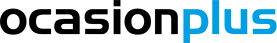

In [8]:
print(sopa_coches.prettify())

Resultado final

In [9]:
def scrape_coches_ocasion(url):
    res_coches = requests.get(url)

    # Comprobamos el código de estado de la respuesta
    if res_coches.status_code != 200:
        print(f"Error al obtener la página. Código de estado: {res_coches.status_code}")
        return None
    
    sopa_coches = BeautifulSoup(res_coches.content, "html.parser")

    # Nombre de los coches
    lista_nombres = sopa_coches.find_all("h2", {"style": "overflow-x:hidden"})
    lista_nombres2 = []
    for nombre in lista_nombres:
        lista_nombres2.append(nombre.getText())

    
    # Precio original 
        
    lista_precio_original = sopa_coches.find_all("span",{"class": "jsx-2870186023 priceLast"})
    precio_original = []
    
    for precio in lista_precio_original:
        precio_original_text= precio.getText()
       
        try:
            
            precio_limpio = precio_original_text.split()[0].replace("[", "").replace("]", "")
            precio_original.append(precio_limpio)

        except IndexError:
            # Por si la lista resultante de split() está vacía
            print(f"Error al procesar: {precio_original_text}")
    
    
    # Precio rebajado

    lista_precio_rebajados = sopa_coches.find_all("span",{"class": "jsx-2689423372 price"})
    precio_rebajado =[]

    for precio in lista_precio_rebajados:
        precio_rebajado_text = precio.getText()

        try:
            
            precio_limpio = precio_rebajado_text.split()[0].replace(",", "").replace("[", "").replace("]", "")
            precio_rebajado.append(precio_limpio)

        except IndexError:
            
            print(f"Error al procesar: {precio_rebajado_text}")



    #Kilometros

    kms = sopa_coches.find_all("span", {"class": "jsx-3960002075 detail big"})
    lista_kms = []
    for elemento in kms:
        text = elemento.getText()
        if "km" in text:
            lista_kms.append(text)

   
    # Creamos un diccionario donde iremos guardando cada lista con su información: 
    diccionario_coches = {"Coche":[] , "Precio Rebajado": [], "Precio Original": [], "Kilómetros": []}

    # No todas las listas tienen la misma longitud, eso nos dará error y no podremos crear un DataFrame

    diccionario_coches = {
    "Coche": pd.Series(lista_nombres2),
    "Precio Rebajado": pd.Series(precio_rebajado),
    "Precio Original": pd.Series(precio_original),
    "Kilómetros": pd.Series(lista_kms)
    }

    df_coches = pd.DataFrame(diccionario_coches)
    
    return df_coches

In [10]:
resultado = scrape_coches_ocasion(url)

In [11]:
resultado

,Coche,Precio Rebajado,Precio Original,Kilómetros
0,Citroen Berlingo BlueHDi 130 S&S Talla M Shine...,19.536€,21.490€,76.197 km
1,Hyundai i10 1.2 Black Line (87 CV),11.300€,16.200€,62.513 km
2,Peugeot 508 SW BlueHDI 180 Allure EAT6 (180 CV),14.727€,18.800€,89.575 km
3,Ford Focus 1.0 Ecoboost S&S ST-Line (125 CV),17.090€,24.700€,40.670 km
4,Suzuki Jimny 1.5 Pro (102 CV) 4x4,22.454€,16.300€,32.639 km
5,Honda Civic 1.0 I-VTEC TURBO Elegance (129 CV),14.818€,34.990€,150.101 km
6,SEAT Leon ST 2.0 TSI S&S Cupra 4Drive DSG (300...,31.809€,26.850€,65.265 km
7,Peugeot 2008 SUV 1.2 PureTech 110 S&S,9.363€,27.500€,87.105 km
8,Nissan Qashqai DIG-T 140 N-Connecta (140 CV),24.409€,27.700€,10.487 km
9,Nissan Qashqai DIG-T (158CV) mHEV 4x2 Tekna,25.000€,27.500€,55.011 km
